#Librerias

In [41]:
import requests
from io import StringIO
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf

#Ejemplo 2 variables

In [27]:
test = yf.Ticker('AAPL')
appl = test.institutional_holders
appl['Company'] = test.ticker
appl

,Date Reported,Holder,pctHeld,Shares,Value,pctChange,Company
0,2025-06-30,Vanguard Group Inc,0.0954,1415932804,353048680164,0.0108,AAPL
1,2025-06-30,Blackrock Inc.,0.0774,1148838990,286451509559,0.0076,AAPL
2,2025-06-30,State Street Corporation,0.0405,601249995,149915671551,0.0088,AAPL
3,2025-06-30,"Geode Capital Management, LLC",0.0239,354749794,88453312336,0.0141,AAPL
4,2025-06-30,"FMR, LLC",0.0207,306758594,76487186704,-0.0650,AAPL
5,2025-06-30,"Berkshire Hathaway, Inc",0.0189,280000000,69815198974,-0.0667,AAPL
6,2025-06-30,Morgan Stanley,0.0157,233198646,58145749539,-0.0333,AAPL
7,2025-06-30,JPMORGAN CHASE & CO,0.0145,214606399,53509958740,0.0798,AAPL
8,2025-06-30,Price (T.Rowe) Associates Inc,0.0137,202720404,50546304790,-0.0558,AAPL
9,2025-06-30,NORGES BANK,0.0128,189804820,47325933123,0.0141,AAPL


In [24]:
test.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [28]:
test2 = yf.Ticker('MSFT')
msft = test2.institutional_holders
msft['Company'] = test2.ticker
msft

,Date Reported,Holder,pctHeld,Shares,Value,pctChange,Company
0,2025-06-30,Vanguard Group Inc,0.0949,705077786,362008082501,0.0198,MSFT
1,2025-06-30,Blackrock Inc.,0.0782,581577056,298599103602,-0.0029,MSFT
2,2025-06-30,State Street Corporation,0.0403,299196519,153616466558,0.0107,MSFT
3,2025-06-30,"FMR, LLC",0.0276,204939437,105222053637,0.0532,MSFT
4,2025-06-30,"Geode Capital Management, LLC",0.0241,179001751,91904867704,0.0201,MSFT
5,2025-06-30,JPMORGAN CHASE & CO,0.0211,157058938,80638769387,0.1060,MSFT
6,2025-06-30,Price (T.Rowe) Associates Inc,0.0184,136870079,70273203658,0.0407,MSFT
7,2025-06-30,Morgan Stanley,0.0160,119097822,61148393877,-0.0383,MSFT
8,2025-06-30,NORGES BANK,0.0137,101513194,52119918451,-0.0351,MSFT
9,2025-06-30,Northern Trust Corporation,0.0110,81531742,41860841697,-0.0122,MSFT


In [29]:
df = pd.concat([appl, msft])
df

,Date Reported,Holder,pctHeld,Shares,Value,pctChange,Company
0,2025-06-30,Vanguard Group Inc,0.0954,1415932804,353048680164,0.0108,AAPL
1,2025-06-30,Blackrock Inc.,0.0774,1148838990,286451509559,0.0076,AAPL
2,2025-06-30,State Street Corporation,0.0405,601249995,149915671551,0.0088,AAPL
3,2025-06-30,"Geode Capital Management, LLC",0.0239,354749794,88453312336,0.0141,AAPL
4,2025-06-30,"FMR, LLC",0.0207,306758594,76487186704,-0.0650,AAPL
5,2025-06-30,"Berkshire Hathaway, Inc",0.0189,280000000,69815198974,-0.0667,AAPL
6,2025-06-30,Morgan Stanley,0.0157,233198646,58145749539,-0.0333,AAPL
7,2025-06-30,JPMORGAN CHASE & CO,0.0145,214606399,53509958740,0.0798,AAPL
8,2025-06-30,Price (T.Rowe) Associates Inc,0.0137,202720404,50546304790,-0.0558,AAPL
9,2025-06-30,NORGES BANK,0.0128,189804820,47325933123,0.0141,AAPL


In [30]:
G = nx.from_pandas_edgelist(df, source='Holder', target='Company')
G.nodes()

NodeView(('Vanguard Group Inc', 'AAPL', 'Blackrock Inc.', 'State Street Corporation', 'Geode Capital Management, LLC', 'FMR, LLC', 'Berkshire Hathaway, Inc', 'Morgan Stanley', 'JPMORGAN CHASE & CO', 'Price (T.Rowe) Associates Inc', 'NORGES BANK', 'MSFT', 'Northern Trust Corporation'))

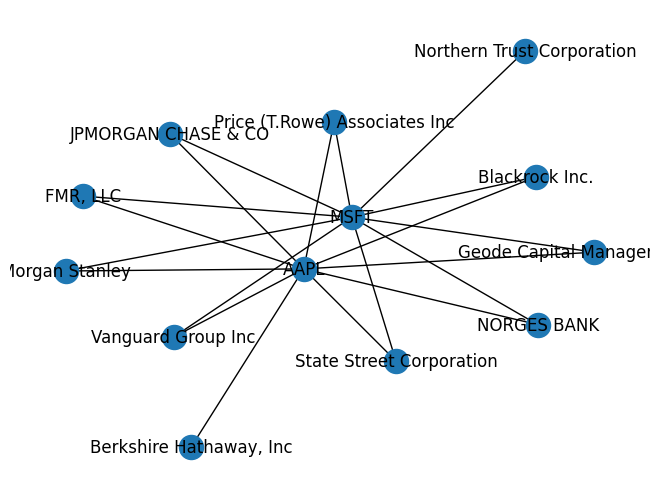

In [31]:
nx.draw(G, with_labels=True)

# Dow Jones 30

In [38]:
import requests

url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
response.raise_for_status()


tickers = pd.read_html(response.text)[1]
tickers.head()

/tmp/ipython-input-3645897993.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tickers = pd.read_html(response.text)[1]


,0,1
0,NaN,"This table's ""industry"" column's factual accur..."


In [47]:
url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
response.raise_for_status()

html = StringIO(response.text)
tables = pd.read_html(html)

#Buscamos la tabla que tenga la columna 'Company'
for i, t in enumerate(tables):
    if 'Company' in t.columns:
        tickers = t
        break

tickers.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.17%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,4.31%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.14%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.99%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.92%


In [48]:
tickers.drop(columns=['Notes'], inplace=True)
tickers.head()

,Company,Exchange,Symbol,Industry,Date added,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,2.17%
1,American Express,NYSE,AXP,Financial services,1982-08-30,4.31%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,4.14%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,2.99%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,2.92%


In [49]:
tickers = tickers.Symbol.to_list()
tickers[:5]

['MMM', 'AXP', 'AMGN', 'AMZN', 'AAPL']

In [66]:
ihs = []
for ticker in tickers:
  var = yf.Ticker(ticker)
  ih = var.institutional_holders
  ih['Company'] = var.ticker
  ihs.append(ih)

In [68]:
#Contiene las 30 compañías del Dow Jones y sus Institutinal Holders
unir = pd.concat(ihs)
unir.head()

,Date Reported,Holder,pctHeld,Shares,Value,pctChange,Company
0,2025-06-30,Vanguard Group Inc,0.0918,48878615,7501401103,0.0074,MMM
1,2025-06-30,JPMORGAN CHASE & CO,0.0776,41307883,6339520854,0.5038,MMM
2,2025-06-30,Blackrock Inc.,0.0744,39640184,6083579086,-0.0382,MMM
3,2025-06-30,State Street Corporation,0.0514,27396916,4204604731,-0.0061,MMM
4,2025-06-30,"Geode Capital Management, LLC",0.0223,11881356,1823431719,0.0032,MMM


## Red Compleja

In [76]:
#edge_attr pone en automatico los valores como atributos de los enlaces
G = nx.from_pandas_edgelist(unir, source='Holder', target='Company', edge_attr=True)
G.nodes()

NodeView(('Vanguard Group Inc', 'MMM', 'JPMORGAN CHASE & CO', 'Blackrock Inc.', 'State Street Corporation', 'Geode Capital Management, LLC', 'Capital World Investors', 'FMR, LLC', 'Morgan Stanley', 'Laurel Wealth Advisors LLC', 'NORGES BANK', 'Berkshire Hathaway, Inc', 'AXP', 'Wellington Management Group, LLP', 'Fisher Asset Management, LLC', 'AMGN', 'Capital International Investors', 'Charles Schwab Investment Management, Inc.', 'Primecap Management Company', 'AMZN', 'Price (T.Rowe) Associates Inc', 'Northern Trust Corporation', 'AAPL', 'BA', 'Capital Research Global Investors', 'Newport Trust Company, LLC', 'LOOMIS SAYLES & CO L P', 'CAT', 'State Farm Mutual Automobile Insurance Co', 'Gates Foundation Trust', 'CVX', 'Bank of America Corporation', 'Royal Bank of Canada', 'CSCO', 'KO', 'DIS', 'GS', 'Bank Of New York Mellon Corporation', 'HD', 'HON', 'IBM', 'UBS AM, a distinct business unit of UBS ASSET MANAGEMENT AMERICAS LLC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'NVDA', 'PG', '

In [80]:
edgelist = nx.to_edgelist(G)
edgelist

EdgeDataView([('Vanguard Group Inc', 'MMM', {'Date Reported': Timestamp('2025-06-30 00:00:00'), 'pctHeld': 0.091800004, 'Shares': 48878615, 'Value': 7501401103, 'pctChange': 0.0074}), ('Vanguard Group Inc', 'AXP', {'Date Reported': Timestamp('2025-06-30 00:00:00'), 'pctHeld': 0.066700004, 'Shares': 46425262, 'Value': 15350977302, 'pctChange': 0.0127}), ('Vanguard Group Inc', 'AMGN', {'Date Reported': Timestamp('2025-06-30 00:00:00'), 'pctHeld': 0.0998, 'Shares': 53711570, 'Value': 15969524385, 'pctChange': 0.0159}), ('Vanguard Group Inc', 'AMZN', {'Date Reported': Timestamp('2025-06-30 00:00:00'), 'pctHeld': 0.0797, 'Shares': 849721601, 'Value': 183174491751, 'pctChange': 0.021}), ('Vanguard Group Inc', 'AAPL', {'Date Reported': Timestamp('2025-06-30 00:00:00'), 'pctHeld': 0.0954, 'Shares': 1415932804, 'Value': 353048680164, 'pctChange': 0.0108}), ('Vanguard Group Inc', 'BA', {'Date Reported': Timestamp('2025-06-30 00:00:00'), 'pctHeld': 0.0883, 'Shares': 66773360, 'Value': 14289499040

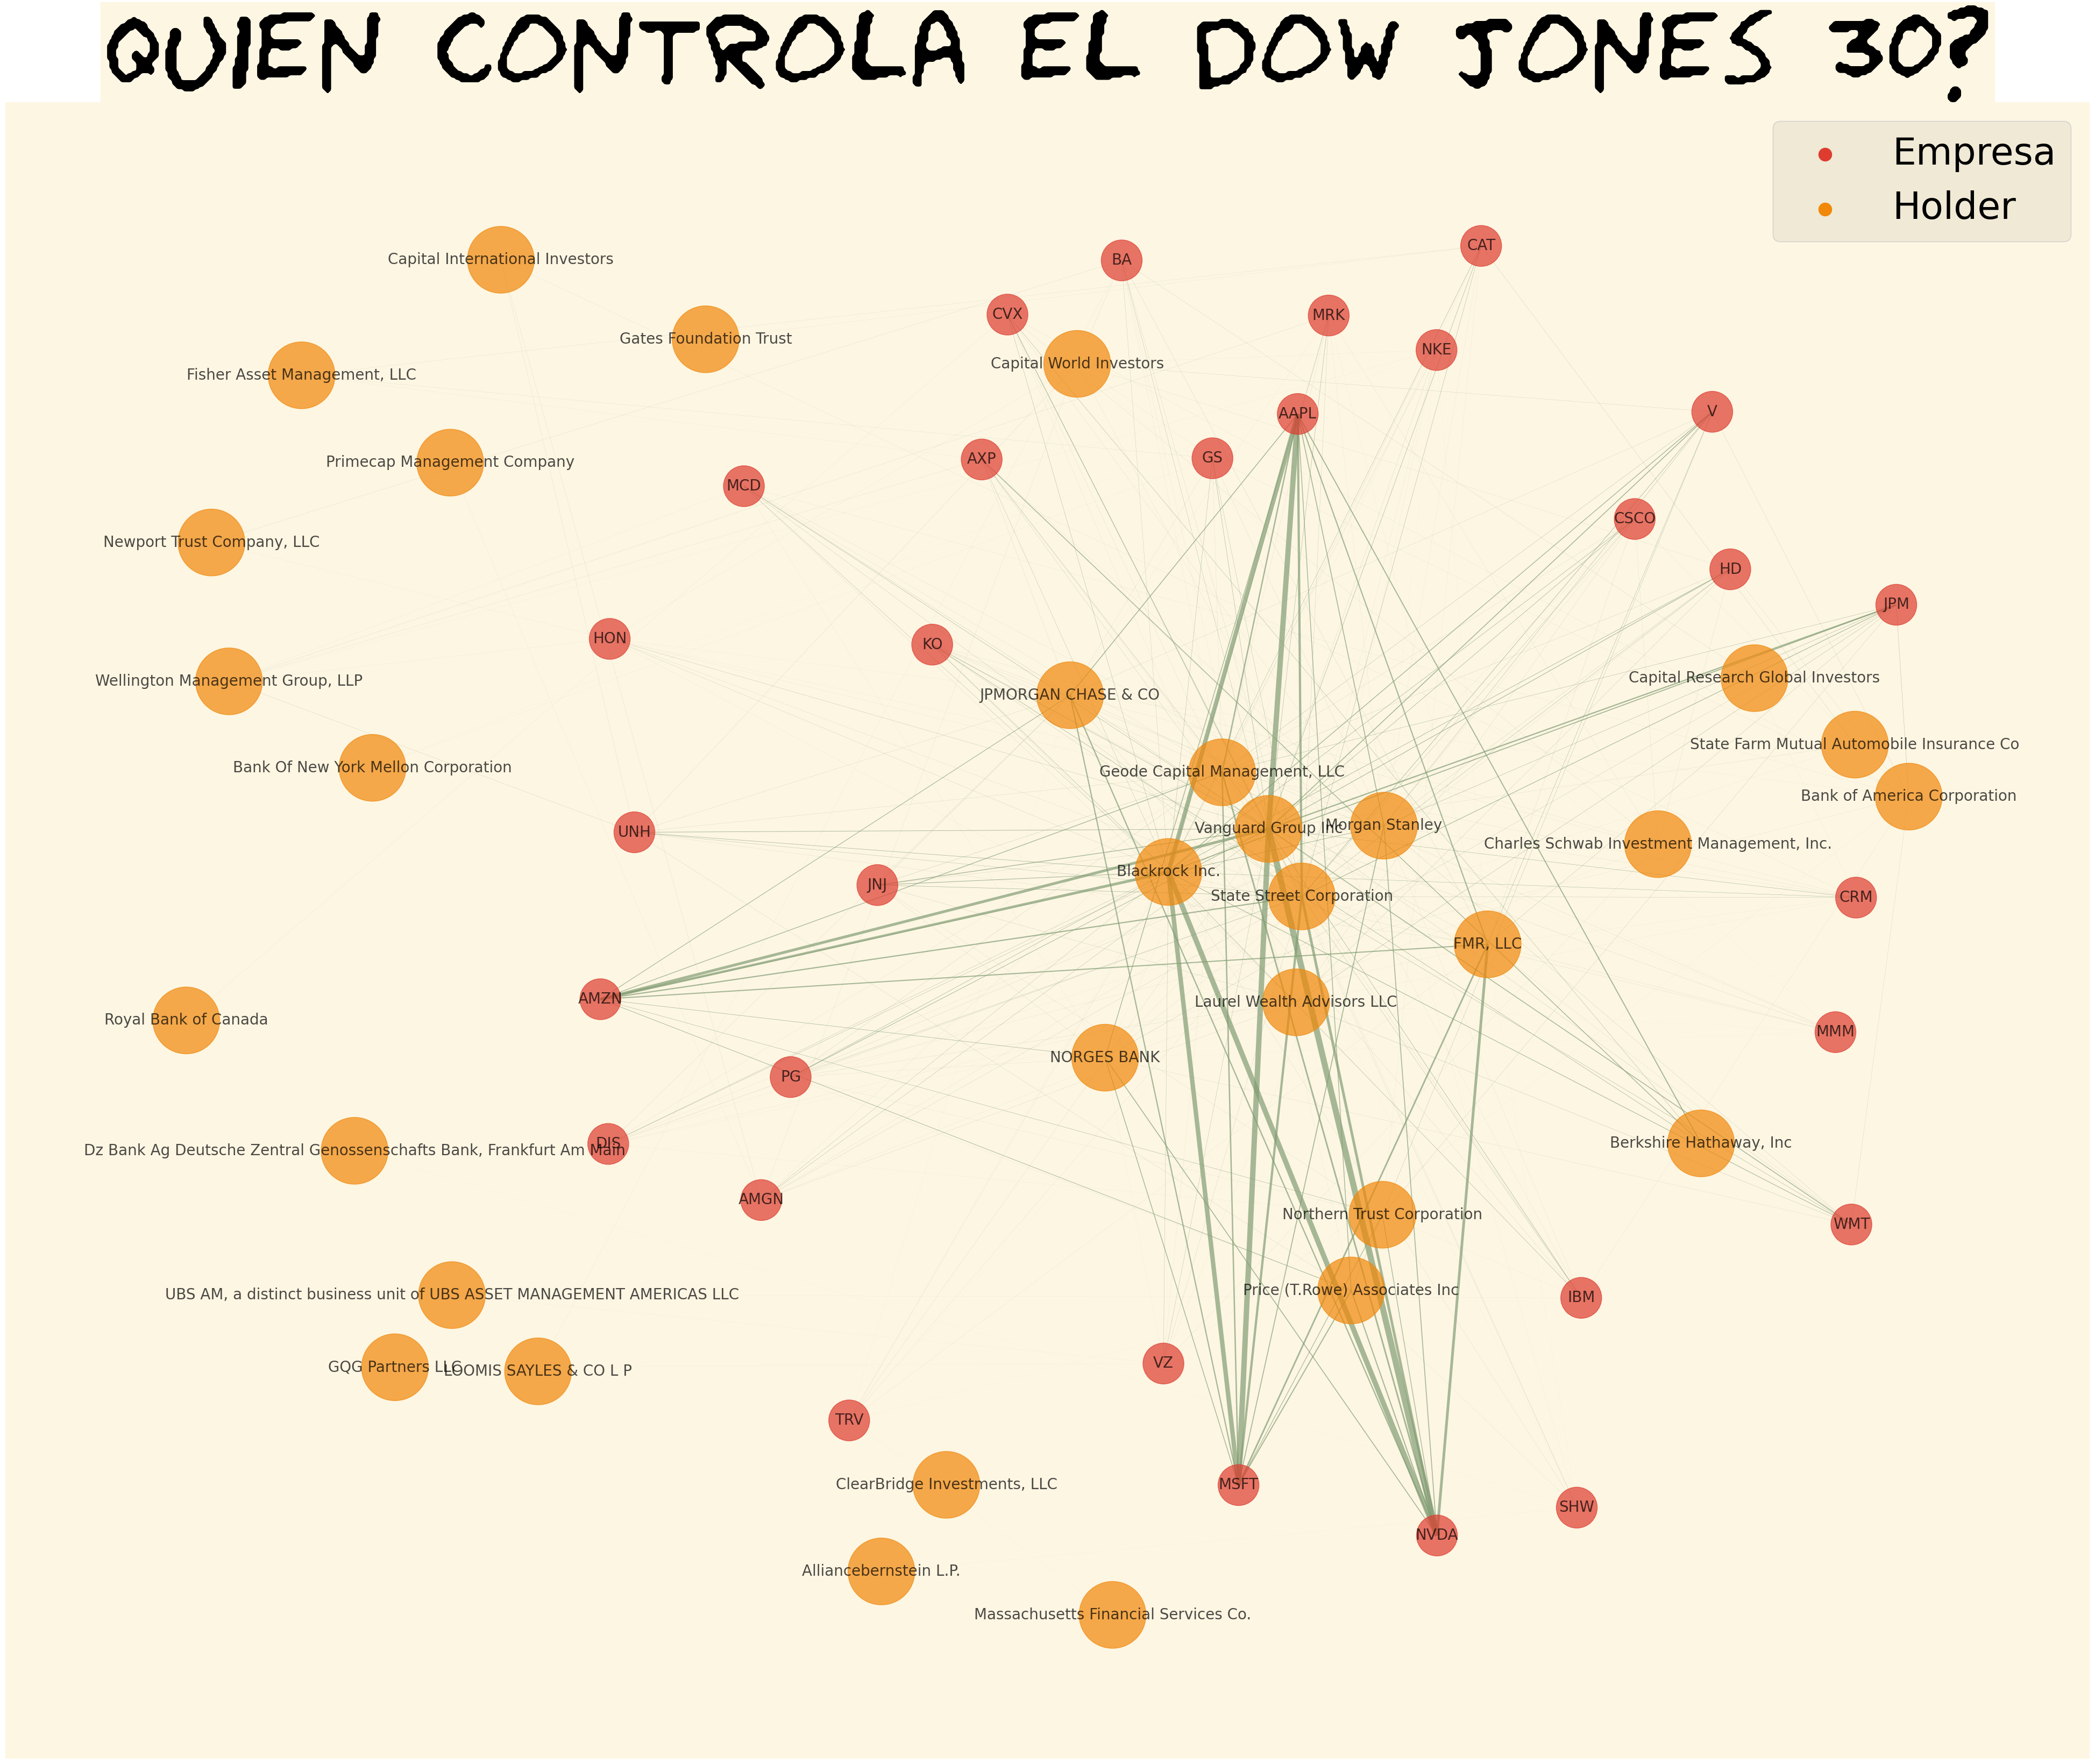

In [108]:
#Color de los enlaces para diferenciar las compañías de los Holders
color = []
for node in G.nodes():
    if node in unir['Company'].values:
        color.append('#de3c2f')
    else:
        color.append('#f18809')

acciones = set(tickers)

plt.figure(figsize=(50,40))
ax = plt.gca()

#Fondo color "Solarize"
ax.scatter([0], [0], s=10000000000, c='#fdf6e3', alpha=1, zorder=0)

nx.draw(G,
        pos = nx.spring_layout(G, k=0.85, iterations=20), #k la distancia entre los nodos, default 1/sqrt(n)
        with_labels=True,
        node_color=color,
        node_size=[3000 if n in acciones else 8000 for n in G.nodes()],
        width=[v[2]['Value']/50_000_000_000 for v in edgelist],
        edge_color='#829d74',
        alpha=0.7, #transparencia
        font_size=20,
        font_color='black',
        ax=ax)

plt.title("Quien controla el Dow Jones 30?", fontsize=140, fontname='Humor Sans', pad=30, backgroundcolor='#fdf6e3')

#Mostrar en el grafico que representan los colores
plt.scatter([], [], c='#de3c2f', label='Empresa', s=300)
plt.scatter([], [], c='#f18809', label='Holder', s=300)
plt.legend(loc='upper right', fontsize=50, frameon=True, framealpha=0.9)

plt.axis('off')
plt.show()

## Análisis de la Red Compleja

In [113]:
#Quien tiene mas grado?
grado_df = pd.DataFrame.from_dict(dict(G.degree()), orient='index', columns=['Grado'])
grado_df.sort_values(by='Grado', ascending=False).head()

,Grado
Vanguard Group Inc,30
Blackrock Inc.,30
"Geode Capital Management, LLC",30
State Street Corporation,30
Morgan Stanley,28


Entonces, los que controlan el Dow Jones son Vanguard y Blackrock

In [117]:
#Quien tiene mas grado pero considerando el dinero total
grado_ponderado = {}
for node in G.nodes():
    total = sum([data['Value'] for u, v, data in G.edges(node, data=True)])
    grado_ponderado[node] = total
grado_df['Grado_Ponderado'] = pd.Series(grado_ponderado)

grado_df.sort_values(by='Grado_Ponderado', ascending=False).head(10)

,Grado,Grado_Ponderado
Vanguard Group Inc,30,1969601537752
Blackrock Inc.,30,1629454835965
NVDA,10,1524717895413
MSFT,10,1317391701072
AAPL,10,1233699505480
State Street Corporation,30,915492387384
AMZN,10,696418594294
"FMR, LLC",19,521195035497
"Geode Capital Management, LLC",30,492719497829
Morgan Stanley,28,356395697040


De nuevo Vanguard y Blackrock, sin embargo, al considerar el dinero total, podemos ver que Geode Capital, State Street Corporation y Morgan Stanley están por debajo de empresas como NVDA, MSFT o AAPL.

¿Esto quiere decir que Geode, State y Morgan tienen mucho menos dinero? no necesariamente, puede que ellos tengan inversiones mas importantes en otros índices.

Assets Under Management (AUM) de cada fondo:
 * AAPL - $3.6B

 * Geode Capital Management, LLC - $1.7T

 * Morgan Stanley - $1.81T

 * State Street Corporation - $4.1T

 * Vanguard Group Inc - $11T

 * Blackrock - $13T

In [125]:
#Normalizamos los pesos de Value para evitar problemas de convergencia
max_val = max(data['Value'] for u,v,data in G.edges(data=True))
for u,v,data in G.edges(data=True):
    data['Value'] /= max_val

#Crear DataFrame con métricas de nodos
grado_df = pd.DataFrame({
    'Grado': pd.Series(dict(G.degree())),
    'Grado_Ponderado': pd.Series({n: sum(data['Value'] for _,_,data in G.edges(n,data=True)) for n in G.nodes()}),
    'Tipo': pd.Series(['Empresa' if n in unir['Company'].values else 'Holder' for n in G.nodes()], index=G.nodes())
})

grado_df['Centralidad_Grado'] = pd.Series(nx.degree_centrality(G))
grado_df['Centralidad_Intermedia'] = pd.Series(nx.betweenness_centrality(G, weight='Value'))
grado_df['Centralidad_Cercania'] = pd.Series(nx.closeness_centrality(G))
grado_df['Centralidad_Eigenvector'] = pd.Series(nx.eigenvector_centrality(G, max_iter=100000, weight='Value', tol=1e-06))

In [126]:
#Mayor eigenvector
grado_df.sort_values('Centralidad_Eigenvector', ascending=False).head(20)

,Grado,Grado_Ponderado,Tipo,Centralidad_Grado,Centralidad_Intermedia,Centralidad_Cercania,Centralidad_Eigenvector
Vanguard Group Inc,30,4.906089,Holder,0.491803,0.000000,0.663043,0.479341
NVDA,10,3.797927,Empresa,0.163934,0.000000,0.455224,0.424040
Blackrock Inc.,30,4.058817,Holder,0.491803,0.000000,0.663043,0.398974
MSFT,10,3.281497,Empresa,0.163934,0.000000,0.455224,0.369463
AAPL,10,3.073028,Empresa,0.163934,0.000000,0.455224,0.350398
State Street Corporation,30,2.280404,Holder,0.491803,0.000000,0.663043,0.208302
AMZN,10,1.734712,Empresa,0.163934,0.000000,0.455224,0.192070
"FMR, LLC",19,1.298247,Holder,0.311475,0.116393,0.491935,0.156823
"Geode Capital Management, LLC",30,1.227317,Holder,0.491803,0.118033,0.663043,0.121913
JPMORGAN CHASE & CO,18,0.873513,Holder,0.295082,0.014754,0.462121,0.093023


NVDA, MSFT, AAPL, AMZN tienen alta centralidad de eigenvector, esto quiere decir que la mayoría de "Holders" tiene activos de estas empresas. De ser el caso, tendrían una alta influencia en el mercado de forma indirecta.

In [127]:
#mayor cercania
grado_df.sort_values('Centralidad_Cercania', ascending=False).head(20)

,Grado,Grado_Ponderado,Tipo,Centralidad_Grado,Centralidad_Intermedia,Centralidad_Cercania,Centralidad_Eigenvector
Vanguard Group Inc,30,4.906089,Holder,0.491803,0.000000,0.663043,0.479341
Blackrock Inc.,30,4.058817,Holder,0.491803,0.000000,0.663043,0.398974
"Geode Capital Management, LLC",30,1.227317,Holder,0.491803,0.118033,0.663043,0.121913
State Street Corporation,30,2.280404,Holder,0.491803,0.000000,0.663043,0.208302
Morgan Stanley,28,0.887748,Holder,0.459016,0.156831,0.622449,0.078612
"FMR, LLC",19,1.298247,Holder,0.311475,0.116393,0.491935,0.156823
JPMORGAN CHASE & CO,18,0.873513,Holder,0.295082,0.014754,0.462121,0.093023
MMM,10,0.083871,Empresa,0.163934,0.121311,0.455224,0.008066
AXP,10,0.287517,Empresa,0.163934,0.022404,0.455224,0.018068
CAT,10,0.239534,Empresa,0.163934,0.047541,0.455224,0.023936


Vanguard, Blackrock, Geode, State Street  y Morgan Stanley tienen alta centralidad de cercanía, eso quiere decir que pueden "alcanzar" a todos los nodos de forma sencilla. Podriamos decir que son hubs o nodos muy importantes (por lo que esta metrica realmente no aporta tanta información, pues ya se suponia que los Holders tendrian mas relevancia).

In [128]:
#mayor intermedia
grado_df.sort_values('Centralidad_Intermedia', ascending=False).head(20)

,Grado,Grado_Ponderado,Tipo,Centralidad_Grado,Centralidad_Intermedia,Centralidad_Cercania,Centralidad_Eigenvector
NORGES BANK,16,0.586230,Holder,0.262295,0.195628,0.442029,0.066818
Morgan Stanley,28,0.887748,Holder,0.459016,0.156831,0.622449,0.078612
TRV,10,0.071326,Empresa,0.163934,0.137158,0.455224,0.007133
MMM,10,0.083871,Empresa,0.163934,0.121311,0.455224,0.008066
SHW,10,0.077277,Empresa,0.163934,0.118579,0.455224,0.007810
"Geode Capital Management, LLC",30,1.227317,Holder,0.491803,0.118033,0.663043,0.121913
"FMR, LLC",19,1.298247,Holder,0.311475,0.116393,0.491935,0.156823
DIS,10,0.167519,Empresa,0.163934,0.108743,0.455224,0.017808
Northern Trust Corporation,9,0.344831,Holder,0.147541,0.107650,0.371951,0.040105
Laurel Wealth Advisors LLC,15,0.248585,Holder,0.245902,0.107104,0.435714,0.003775


Norges Bank sería un "puente" en la red (curiosamente es un banco noruego) a pesar de que no tenga un grado alto.

Vanguard y Blackrock son hubs, su estrategia está en la concentración de conexiones directas y en influir a nodos importantes (eigenvector alto), no en conectar clusters distintos.

In [130]:
componentes = list(nx.connected_components(G))
print(f"Número de componentes conexas: {len(componentes)}")

Número de componentes conexas: 1


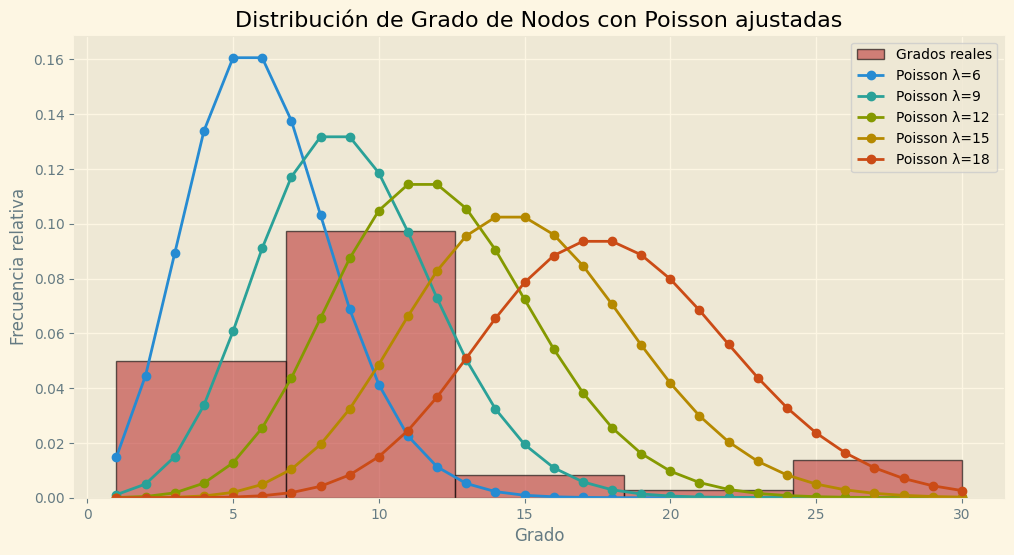

In [145]:
import numpy as np
from scipy.stats import poisson

grado = dict(G.degree())
valores = np.array(list(grado.values()))

#Parámetros lambda a probar
lambdas = [i for i in range(6,20,3)]

plt.figure(figsize=(12,6))

counts, bins, _ = plt.hist(valores, bins=5, color='#bd3737', edgecolor='black', alpha=0.6, label='Grados reales', density=True)

#Graficar la distribución Poisson sobre el histograma
x = np.arange(min(valores), max(valores)+1)
for lam in lambdas:
    plt.plot(x, poisson.pmf(x, lam), 'o-', label=f'Poisson λ={lam}')

plt.title('Distribución de Grado de Nodos con Poisson ajustadas')
plt.xlabel('Grado')
plt.ylabel('Frecuencia relativa')
plt.legend()
plt.show()

Una de las características exploradas por Watts y Steve Strogatz es que la distribución de grado de este tipo de **redes de pequeño mundo** que son generadas debía corresponder a una distribución de Poisson, pero pronto se vio que las redes de mundo pequeño pueden tener distribuciones de grado que siguen una distribución exponencial (como es el caso de las redes libres de escala)